# Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from copy import deepcopy
from itertools import combinations
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import directed_hausdorff
import seaborn as sns
import re

# Loading the dataframe

In [2]:
file_path = "20181024_d1_0830_0900.csv" # Is the same as 20181024_d1_0830_0900.csv

# Showing how many values there are in each row

In [3]:
with open(file_path) as f:
    i = 0
    for line in f:
        i+=1
        if i == 20:
            break
        if i != 1:
            print(len(line.split(";")), i)

2711 2
2681 3
1901 4
3011 5
3011 6
4961 7
3641 8
3941 9
4121 10
4571 11
5411 12
3881 13
3401 14
4661 15
5111 16
5231 17
122831 18
7721 19


In [3]:
import pandas as pd
def chunk_list(lst, chunk_size=6):
    return [lst[i:i + chunk_size] for i in range(0, len(lst), chunk_size)]

def parse_vehicle_data(file_path):
    return_dict = {}
    with open(file_path) as f:
        i = 0
        for line in f:
            i+=1
            split = line.replace(" ", "").strip().split(";")
            track_id = split[0]
            split = line.replace(" ", "").strip().split(";")[4:]
            
            if i != 1:
                chunk = chunk_list(split)
            
                if len(chunk[-1]) == 1 and chunk[-1][0] == "":
                    chunk = chunk[:-1] 
                if track_id in return_dict:
                    print("whaaat?")
                return_dict[track_id] = pd.DataFrame(chunk, columns=["lat", "lon", "speed", "lon_acc", "lat_acc", "time"])
                
    return return_dict
            

info_dict = parse_vehicle_data(file_path)

In [5]:
car_of_interest = "10"

In [58]:
info_dict["10"].head()

lat        lon   speed  lon_acc  lat_acc      time
0  37.978190  23.737050  4.0538   0.1084  -0.0000  0.000000
1  37.978190  23.737051  4.0597  -0.0259   0.0000  0.040000
2  37.978189  23.737051  4.0500  -0.1086  -0.0000  0.080000
3  37.978189  23.737051  4.0285  -0.1913  -0.0000  0.120000
4  37.978189  23.737052  3.9894  -0.3514   0.0000  0.160000

# Plotting an example trajectory

## Plotting on matplotlib

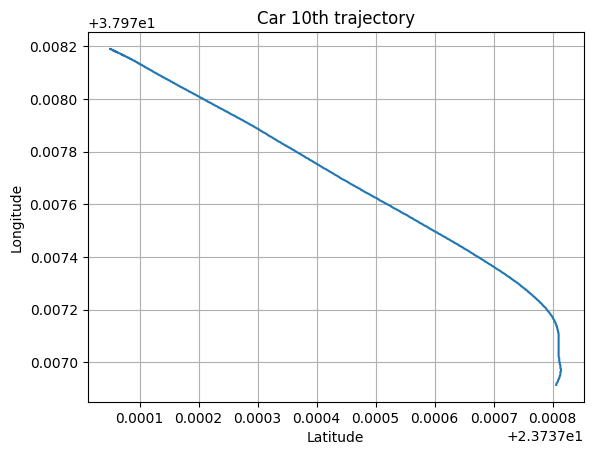

In [59]:

plt.plot(info_dict[car_of_interest]["lon"].astype(float), info_dict[car_of_interest]["lat"].astype(float))
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Car " + car_of_interest + "th trajectory")
plt.show()

## Plotting on the map

In [60]:
def plot_figures(info_dict_key,info_dict=info_dict, colors=None, zoom_start=25):
    latitudes = info_dict[str(info_dict_key)]["lat"].astype(float)
    longitudes = info_dict[str(info_dict_key)]["lon"].astype(float)

    center_lat = latitudes.mean()
    center_lon = longitudes.mean()

    m = folium.Map(location=[center_lat, center_lon], zoom_start=zoom_start)  

    for lat, lon, index in zip(latitudes, longitudes, range(len(latitudes))):
        folium.CircleMarker(
            location=[lat, lon],
            radius=5, 
            color='blue' if colors == None else colors[index],
            fill_color='blue',
            fill_opacity=0.0001
        ).add_to(m)

    return m


In [61]:
plot_figures(car_of_interest)

# Finding vehicles on the same road

## Hausdorff metric

In [ ]:
veh_pairs = list(combinations(list(map( int, list(info_dict.keys()))), 2))

for index, (veh_1, veh_2) in enumerate(veh_pairs):
    # TODO check the implementation of the Hausdorff distance
    u = info_dict[str(veh_1)][["lat", "lon"]].values
    v = info_dict[str(veh_2)][["lat", "lon"]].values
    distance = directed_hausdorff(u, v)[0]
    veh_pairs[index] = [veh_1, veh_2, distance]
    print(index, "done")

## Dynamic Time Warping (DTW) (Time Consuming)

In [ ]:
veh_pairs = list(combinations(list(map( int, list(info_dict.keys()))), 2))

for index, (veh_1, veh_2) in enumerate(veh_pairs):
    distance, path = fastdtw(info_dict[str(veh_1)][["lat", "lon"]].values, info_dict[str(veh_2)][["lat", "lon"]].values, dist=euclidean)
    veh_pairs[index] = [veh_1, veh_2, distance]
    print(index, "done")
    

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123

KeyboardInterrupt: 

# Plotting the matrix

In [ ]:
size = len(info_dict)
matrix = np.full((size, size), np.nan)
# all_distances = []
# for veh_1, veh_2, distance in veh_pairs:
#     matrix[veh_1-1, veh_2-1] = distance
#     matrix[veh_2-1, veh_1-1] = distance
#     all_distances.append(distance)

# plt.figure(figsize=(10, 8))
# plt.title("Heatmap of Hausdorff distances between vehicles")
# sns.heatmap(matrix, cmap='inferno', vmin=min(all_distances), vmax=max(all_distances), annot=False, cbar=True)

# Attaching the dataframes to each other

In [ ]:
info_dict_copy = deepcopy(info_dict)
attached_df = pd.DataFrame()
for key, df in info_dict_copy.items():
    info_dict_copy[key]["veh_id"] = key
    attached_df = pd.concat([attached_df, info_dict_copy[key]], axis=0)

In [ ]:
attached_df

lat        lon    speed  lon_acc  lat_acc        time veh_id
0    37.977391  23.737688   4.9178   0.0518  -0.0299    0.000000      1
1    37.977391  23.737688   4.9207  -0.0124  -0.0354    0.040000      1
2    37.977391  23.737688   4.9160  -0.0519  -0.0413    0.080000      1
3    37.977390  23.737688   4.9057  -0.0914  -0.0478    0.120000      1
4    37.977390  23.737689   4.8871  -0.1679  -0.0550    0.160000      1
..         ...        ...      ...      ...      ...         ...    ...
131  37.978596  23.735866  21.3406  -0.1442  -0.0672  818.640000    922
132  37.978597  23.735868  21.3323  -0.1494  -0.0637  818.680000    922
133  37.978598  23.735870  21.3226  -0.1679  -0.0601  818.720000    922
134  37.978599  23.735872  21.3095  -0.1968  -0.0564  818.760000    922
135  37.978601  23.735875  21.2926  -0.2200  -0.0527  818.800000    922

[1446887 rows x 7 columns]

# Nov 12th, 2024

## Selecting the corridor

In [7]:
corridor_start = np.array((37.979995, 23.735525))
corridor_end = np.array((37.976131, 23.737624))

In [6]:
m = folium.Map(location=(corridor_end+corridor_start)/2, zoom_start=17)
folium.CircleMarker(
            location=corridor_start,
            radius=10, 
            color='blue',
            fill_color='blue',
            fill_opacity=1
        ).add_to(m)  

folium.CircleMarker(
            location=corridor_end,
            radius=10, 
            color='blue',
            fill_color='blue',
            fill_opacity=1
        ).add_to(m)  
m

## Defining Heversine function

In [8]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert to radians after ensuring values are numeric
    try:
        lat1, lon1, lat2, lon2 = map(float, [lat1, lon1, lat2, lon2])
    except ValueError:
        return np.nan  # Return NaN if conversion fails

    R = 6371000  # Earth radius in meters
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

## Applying Heversine func on the data

In [9]:
buffer_distance = 10
def filter_points(data, corridor_start, corridor_end, buffer_distance):
    data['dist_to_start'] = data.apply(lambda row: haversine(row['lat'], row['lon'], *corridor_start), axis=1)
    data['dist_to_end'] = data.apply(lambda row: haversine(row['lat'], row['lon'], *corridor_end), axis=1)

        # Check if there is any point within the buffer distance
    condition_met = (data['dist_to_start'] <= buffer_distance) | (data['dist_to_end'] <= buffer_distance)

    # If any point meets the condition, keep the entire data; otherwise, create an empty DataFrame
    if condition_met.any():
        data_on_corridor = data
    else:
        data_on_corridor = pd.DataFrame()  # Create an empty DataFrame if no points meet the condition

    return data_on_corridor

info_dict_copy = deepcopy(info_dict)

keys_to_delete = []

for key, df in info_dict_copy.items():
    filtered_df = filter_points(df, corridor_start, corridor_end, buffer_distance)
    info_dict_copy[key] = filtered_df
    if filtered_df.empty:
        keys_to_delete.append(key)
    else:
        pass
for key in keys_to_delete:
    del info_dict_copy[key]


# November 19th

## Dividing the corridor to `n` segments

In [ ]:
import geopandas as gpd
from shapely.geometry import LineString

def divide_corridor_geo(coords, n):
    """
    Divide a corridor into n segments and return as GeoDataFrame.
    """
    from shapely.geometry import LineString
    import numpy as np

    # Create the LineString
    corridor = LineString(coords)

    # Divide the line into n segments
    distances = np.linspace(0, corridor.length, n + 1)
    segments = [LineString([corridor.interpolate(distances[i]), corridor.interpolate(distances[i + 1])])
                for i in range(len(distances) - 1)]

    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(geometry=segments, crs="EPSG:4326")  # Default to WGS 84
    return gdf

## Defining the corridor

In [168]:
# Divide the corridor into segments
coords = [(37.98027257349481, 23.735392720193808), (37.97721963700775, 23.737817437139878), (37.976018724154066, 23.7376135892483)]
n = 15
segments_gdf = divide_corridor_geo(coords, n)
segments_gdf_epsg = segments_gdf.to_crs("EPSG:4326")  # Replace with your appropriate UTM zone
# Calculate lengths of segments
segments_gdf_epsg['length'] = segments_gdf.geometry.length
segments_gdf_epsg
segments_gdf.to_csv("20181024_d1_0830_0900_segments.csv", index=False)

/var/folders/08/xlt8ht5x04x0hg_fhxdwdl7m0000gr/T/ipykernel_24600/4076984920.py:7: UserWarning:

Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




## Visualize the segments

In [51]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(42)
def random_color():
    r = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r(),r(),r())


list_of_colors = []
def visualize_corridor_map(segments_gdf):
    """
    Visualize divided segments on an interactive map using Folium.
    """
    # Get the centroid of  the first geometry for map centering
    center = segments_gdf.geometry.centroid.iloc[0].coords[0]
    m = folium.Map(location=[center[0], center[1]], zoom_start=17)  # folium expects (lat, lon)
    
    # Add each segment to the map with a unique color
    for idx, segment in enumerate(segments_gdf.geometry):
        coords = [(x, y) for x, y in segment.coords]  # folium expects (lat, lon)
        color = random_color()
        while color in list_of_colors:
            color = random_color()
        list_of_colors.append(color)
        folium.PolyLine(coords, color=color, weight=3).add_to(m)
    
    return m

# Visualize the segments
map_object = visualize_corridor_map(segments_gdf)
map_object.add_child(folium.LatLngPopup())
map_object.save('corridor_map.html')

map_object

/var/folders/08/xlt8ht5x04x0hg_fhxdwdl7m0000gr/T/ipykernel_76340/2098585075.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




## Pre Processing the data

### Making the mai `main_df` with all the rows

In [8]:
main_df = pd.DataFrame()
for key, df in info_dict.items():
    df["veh_id"] = key
    main_df = pd.concat([main_df, df], axis=0)
    

### Finding the closest segment to each point

In [9]:
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import display, HTML, clear_output

i = 0
def progress_bar(progress, total):
    percent = 100 * (progress / float(total))
    bar = '█' * int(percent / 2) + '-' * (50 - int(percent / 2))  # Bar length set to 50
    return f'<div style="font-family:monospace;">|{bar}| {percent:.2f}%</div>'

def find_segment_for_point(segments_gdf, point: Point, length_of_df):
    global i
    """
    Finds the segment(s) to which a point belongs and displays a live-updating progress bar.

    Args:
        segments_gdf (GeoDataFrame): GeoDataFrame containing segment geometries.
        point (Point): A Shapely Point object representing the point of interest.

    Returns:
        Index of the segment in segments_gdf that contains the point, or None if no match.
    """
    # # Perform spatial join to find intersecting segments
    # joined_gdf = gpd.sjoin(point_gdf, segments_gdf, how='inner', predicate='intersects')
    temp_distance = float("inf")
    segment_index = None
    for index, row in segments_gdf.iterrows():
        distance = row["geometry"].distance(point)
        if distance < temp_distance:
            temp_distance = distance
            segment_index = index

    # Update the progress bar
    i += 1
    clear_output(wait=True)
    display(HTML(progress_bar(i, length_of_df)))
    
    # Return the matching segment index
    return segment_index, temp_distance


#### Try `find_segment_for_point` on a small chunk

In [24]:
i = 0 # Global variable for find_segment_for_point

temp_df = main_df.copy()[1:1000]

temp_df["segment_id"] = temp_df.apply(lambda row: find_segment_for_point(segments_gdf, Point(row['lat'], row['lon']), len(temp_df)), axis=1)

In [ ]:
temp_df

lat        lon    speed  lon_acc  lat_acc      time veh_id  \
1    37.977391  23.737688   4.9207  -0.0124  -0.0354  0.040000      1   
2    37.977391  23.737688   4.9160  -0.0519  -0.0413  0.080000      1   
3    37.977390  23.737688   4.9057  -0.0914  -0.0478  0.120000      1   
4    37.977390  23.737689   4.8871  -0.1679  -0.0550  0.160000      1   
5    37.977389  23.737689   4.8547  -0.2815  -0.0628  0.200000      1   
..         ...        ...      ...      ...      ...       ...    ...   
98   37.977785  23.737438  28.2680   0.1120   0.1520  3.920000      3   
99   37.977783  23.737440  28.2835   0.1028   0.1594  3.960000      3   
100  37.977781  23.737442  28.2967   0.0804   0.1667  4.000000      3   
101  37.977778  23.737444  28.3055   0.0421   0.1738  4.040000      3   
102  37.977776  23.737446  28.3094   0.0118   0.1807  4.080000      3   

                      segment_id  
1    (10, 5.218023976236066e-06)  
2    (10, 5.218023976236066e-06)  
3    (10, 4.596090523205615e-06)  
4    (10, 5.379160621797771e-06)  
5     (10, 4.75722716876732e-06)  
..                           ...  
98    (9, 5.449228064303831e-05)  
99     (9, 5.48145539313932e-05)  
100   (9, 5.513682721811098e-05)  
101   (9, 5.483716704902008e-05)  
102   (9, 5.515944033295585e-05)  

[999 rows x 8 columns]

### Projecting the point into a single axis

In [8]:
from pyproj import Proj, Transformer
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import display, HTML, clear_output


i = 0
def progress_bar(progress, total):
    percent = 100 * (progress / float(total))
    bar = '█' * int(percent / 2) + '-' * (50 - int(percent / 2))  # Bar length set to 50
    return f'<div style="font-family:monospace;">|{bar}| {percent:.2f}%</div>'

def lat_lon_to_axis(lat, lon, axis_direction=(1, 0), crs="EPSG:3857", length_of_df=len(main_df)):
    global i
    """
    Convert latitude and longitude to a one-dimensional value in meters along an axis.

    Args:
        lat (float): Latitude of the point.
        lon (float): Longitude of the point.
        axis_direction (tuple): Direction vector of the axis (x, y).
        crs (str): CRS for projecting to meters (default: EPSG:3857).

    Returns:
        float: One-dimensional projection value in meters.
    """
    
    # Define the transformer for projecting lat/lon to the desired CRS
    transformer = Transformer.from_crs("EPSG:4326", crs, always_xy=True)
    
    # Project the latitude and longitude to meters
    x, y = transformer.transform(lon, lat)
    
    # Normalize the axis direction vector
    axis_vector = np.array(axis_direction)
    axis_unit_vector = axis_vector / np.linalg.norm(axis_vector)
    
    # Compute the projection of the point onto the axis
    projection_value = np.dot([x, y], axis_unit_vector)
    # Update the progress bar
    i += 1
    clear_output(wait=True)
    display(HTML(progress_bar(i, length_of_df)))
    return projection_value


#### Run on a small chunk of data

In [27]:
i = 0 # Global variable for find_segment_for_point

temp_df = main_df.copy()[1:1000]

temp_df["one_axis_trajectory"] = temp_df.apply(lambda row: lat_lon_to_axis(row["lat"], row["lon"], axis_direction=(1, 0), length_of_df=len(temp_df)), axis=1)

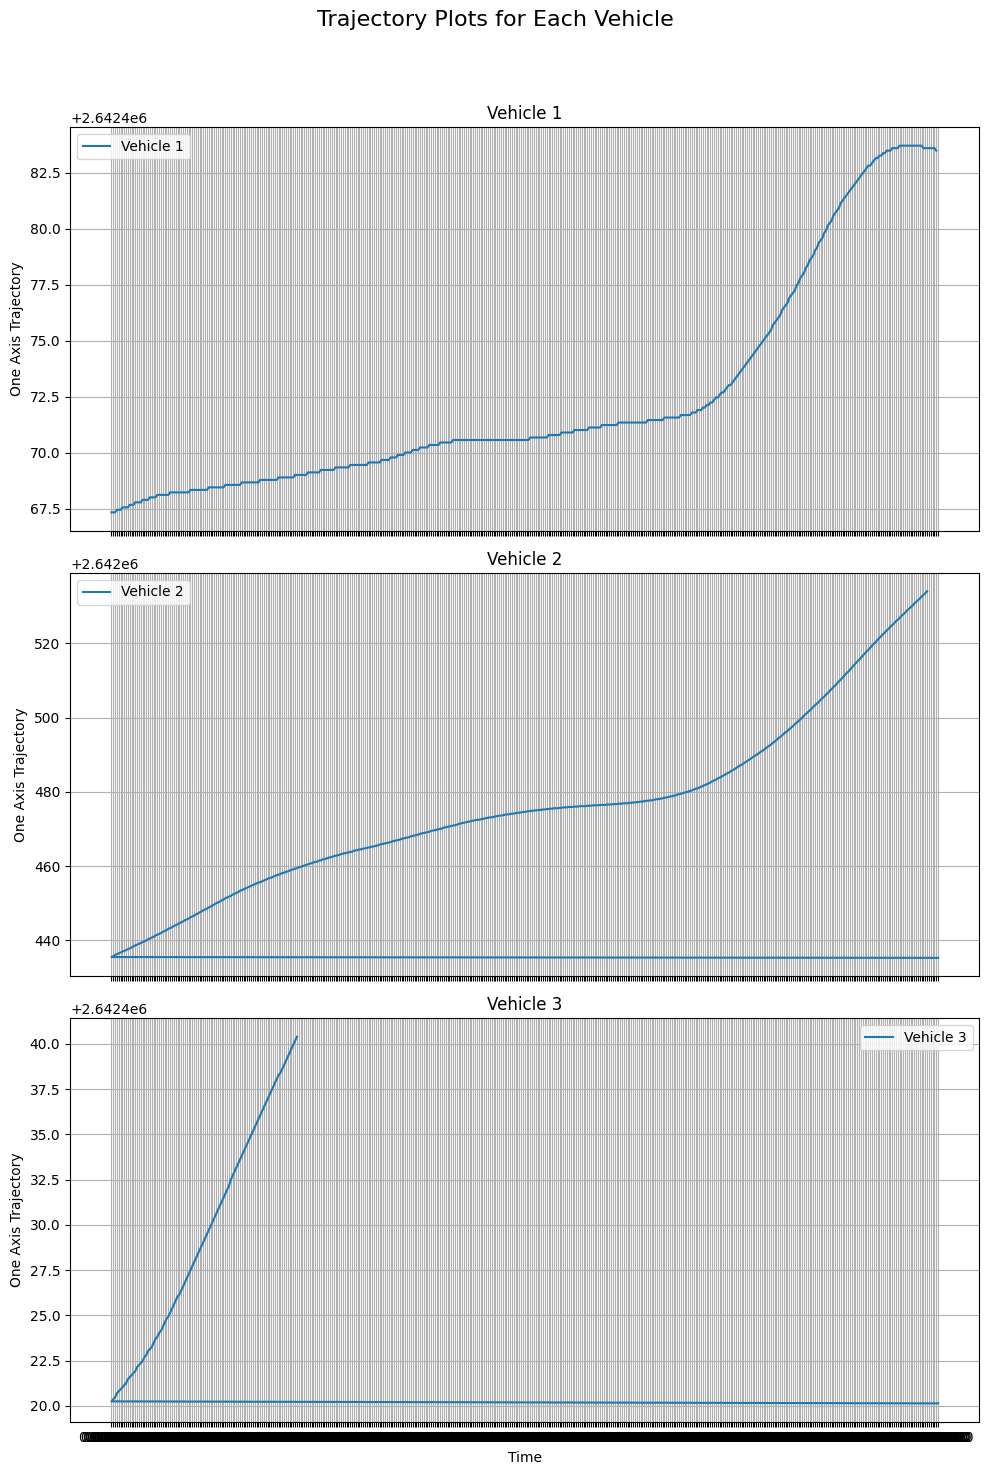

In [28]:
import matplotlib.pyplot as plt

# Unique vehicles
unique_cars = temp_df.veh_id.unique()
no_cars = len(unique_cars)

# Create subplots
fig, axes = plt.subplots(no_cars, 1, figsize=(10, 5 * no_cars), sharex=True)
fig.suptitle('Trajectory Plots for Each Vehicle', fontsize=16)

# Iterate through unique cars and plot
for i, car_id in enumerate(unique_cars):
    # Filter data for the current vehicle
    veh_df = temp_df[temp_df["veh_id"] == car_id]
    
    # Plot on the corresponding subplot
    axes[i].plot(veh_df.time, veh_df.one_axis_trajectory, label=f"Vehicle {car_id}")
    axes[i].set_title(f"Vehicle {car_id}")
    axes[i].set_ylabel("One Axis Trajectory")
    axes[i].legend()
    axes[i].grid(True)

# Add a shared x-axis label
plt.xlabel("Time")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()


### Applying the one-axis function, and find-segment_for_point on the main_df and saving

In [9]:
import os
from shapely.geometry import Point
i = 0 # Global variable for find_segment_for_point
name_without_ext, _ = os.path.splitext(file_path)
main_df = pd.read_csv(name_without_ext + "_segmented.csv")
name_without_ext = name_without_ext + "_segmented_oneaxistrajectory.csv"
with open(name_without_ext, 'w') as f:
    # Write the header
    # header = ','.join(main_df.columns) + ',segment_id,temp_distance,one_axis_trajectory\n'
    header = ','.join(main_df.columns) + ',one_axis_trajectory\n'
    f.write(header)

    # Loop through each row, find the segment ID, and write to the file
    for index, row in main_df.iterrows():
        point = Point(row['lat'], row['lon'])
        # segment_id, temp_distance = find_segment_for_point(segments_gdf, point, len(main_df))
        one_axis_trajectory = lat_lon_to_axis(row["lat"], row["lon"], axis_direction=(1, 0), length_of_df=len(main_df))
        # Write the full row to CSV, including the computed segment_id
        # csv_line = ','.join(map(str, row)) + f',{segment_id},{temp_distance},{one_axis_trajectory}\n'
        csv_line = ','.join(map(str, row)) + f',{one_axis_trajectory}\n'
        f.write(csv_line)

# Finding the Traffic Signal Timings

## Loading the dataframe 

In [235]:
import pandas as pd
from geopy.distance import distance
processed_file_path = "20181024_d1_0830_0900_segmented_oneaxistrajectory.csv"
main_df = pd.read_csv(processed_file_path)
# Reference point (assume near the data for accurate conversion)
ref_point = (main_df["lat"].mean(), main_df["lon"].mean())

# Function to convert degrees to meters using geopy
def convert_to_meters(degrees):
    if degrees == 0:
        return 0
    point_offset = (ref_point[0] + degrees, ref_point[1])  # Offset by temp_distance
    return distance(ref_point, point_offset).meters

main_df["temp_distance"] = main_df["temp_distance"].apply(convert_to_meters)

## Filter the points that the distance is more than 5 meters

In [240]:
filtered_df = main_df[main_df["temp_distance"] <= 5]  # Filter by 10 meters
filtered_df.shape

(343068, 12)

## Grouping based on time and segment_id

In [241]:
grouped_filter_df = filtered_df.groupby(["time", "segment_id"]).size().reset_index(name='vehicle_count')
grouped_filter_df

time  segment_id  vehicle_count
0         0.00         0.0              7
1         0.00         1.0              1
2         0.04         0.0              7
3         0.04         1.0              1
4         0.08         0.0              7
...        ...         ...            ...
151078  818.80         5.0              1
151079  818.80         6.0              3
151080  818.80         7.0              2
151081  818.80         9.0              1
151082  818.80        10.0              2

[151083 rows x 3 columns]

In [208]:
import plotly.graph_objects as go
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
from matplotlib import cm
from matplotlib.colors import Normalize, to_hex

# Normalize vehicle_count to color intensity
norm = Normalize(vmin=grouped_filter_df["vehicle_count"].min(), vmax=grouped_filter_df["vehicle_count"].max())
cmap = cm.Reds

# Prepare Plotly frames for animation
frames = []
for time_frame in sorted(grouped_filter_df["time"].unique())[:1000]:
    frame_data = grouped_filter_df[grouped_filter_df["time"] == time_frame]
    traces = []
    
    for _, row in frame_data.iterrows():
        segment_id = int(row["segment_id"])
        vehicle_count = row["vehicle_count"]
        segment_geometry = segments_gdf.iloc[segment_id]["geometry"]
        # Convert the normalized vehicle_count to a hex color
        color = to_hex(cmap(norm(vehicle_count)))
        
        # Add a line trace for the segment
        trace = go.Scattermapbox(
            lat=[coord[0] for coord in segment_geometry.coords],
            lon=[coord[1] for coord in segment_geometry.coords],
            mode="lines",
            line=dict(color=color, width=5),
            showlegend=False,
            hovertext=f"Segment ID: {segment_id}<br>Vehicles: {vehicle_count}",
            hoverinfo="text"  # Use the hovertext instead of default coordinates
        )
        traces.append(trace)
    
    # Add an annotation for the time
    annotations = [
        dict(
            xref="paper", yref="paper",
            x=0.95, y=0.95,
            xanchor="right", yanchor="top",
            text=f"Time: {time_frame}",
            font=dict(size=16),
            showarrow=False
        )
    ]
    
    # Add traces and annotations to the frame
    frames.append(go.Frame(data=traces, name=f"Time {time_frame}", layout=go.Layout(annotations=annotations)))

# Create the figure with Mapbox
fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(
        title="Vehicle Count Animation on Map",
        mapbox=dict(
            style="carto-positron",  # Choose map style
            center={"lat": filtered_df.lat.mean(), "lon": filtered_df.lon.mean()},  # Center map
            zoom=15  # Adjust zoom level
        ),
        updatemenus=[{
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 1, "redraw": True}, "fromcurrent": True, "transition": {"duration": 0}}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 5, "t": 35},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }]
    ),
    frames=frames
)

fig.write_html("animated_map_2.html")
print("Figure saved as 'animated_map_2.html'")
fig.show()

Figure saved as 'animated_map_2.html'


### Finding Traffic Signal Time

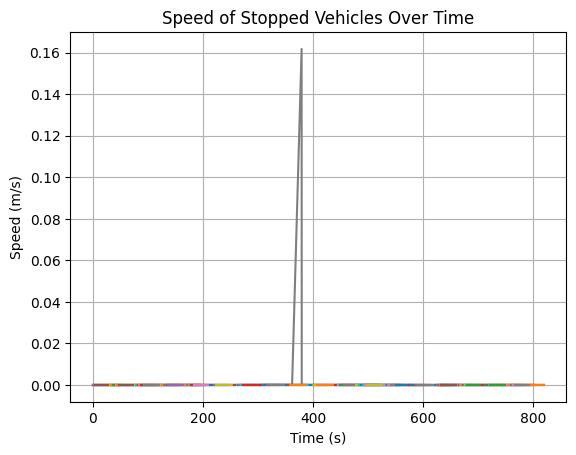

In [242]:
import matplotlib.pyplot as plt

sorted_filtered_df = filtered_df.sort_values(by=["veh_id", "time"])
# Compute differences in trajectory and time
sorted_filtered_df["trajectory_diff"] = sorted_filtered_df.groupby("veh_id")["one_axis_trajectory"].diff()
sorted_filtered_df["time_diff"] = sorted_filtered_df.groupby("veh_id")["time"].diff()

# Calculate speed (distance/time)
sorted_filtered_df["speed"] = sorted_filtered_df["trajectory_diff"] / sorted_filtered_df["time_diff"]
# Handle NaN values (e.g., first row for each vehicle)
sorted_filtered_df["speed"] = sorted_filtered_df["speed"].fillna(0)

grouped_filter_df = sorted_filtered_df.groupby("veh_id")

STOP_THRESHOLD = 0.25
for veh_id, veh_df in grouped_filter_df:
    mask = veh_df["speed"].abs() < STOP_THRESHOLD  # Filter out zero speeds
    plt.plot(veh_df[mask]["time"], veh_df[mask]["speed"], label=f"Vehicle {veh_id}")

plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.title("Speed of Stopped Vehicles Over Time")
plt.show()

In [243]:
stops = []
# Group by vehicle ID
for veh_id, group in sorted_filtered_df.groupby("veh_id"):
    group = group.sort_values("time")
    stop_start = None
    stop_location = None
    
    for i, row in group.iterrows():
        if row["speed"] <= STOP_THRESHOLD:  # Vehicle is stopped
            if stop_start is None:
                stop_start = row["time"]
                stop_location = (row["lat"], row["lon"])
        else: 
            if stop_start is not None:  # End of a stop
                stop_end = row["time"]
                stop_duration = stop_end - stop_start
                stops.append({
                    "veh_id": veh_id,
                    "start_time": stop_start,
                    "end_time": stop_end,
                    "duration": stop_duration,
                    "location": stop_location,
                })
                stop_start = None  # Reset stop start

stops_df = pd.DataFrame(stops)

stops_df

veh_id  start_time  end_time  duration                location
0       32.0        0.00      0.04      0.04  (37.979949, 23.735613)
1       33.0        0.00      0.04      0.04  (37.980003, 23.735585)
2       33.0       38.36     38.40      0.04   (37.97722, 23.737783)
3       33.0       38.48     38.52      0.04  (37.977212, 23.737785)
4       33.0       38.60     38.64      0.04  (37.977204, 23.737787)
...      ...         ...       ...       ...                     ...
5574   911.0      813.00    813.08      0.08  (37.980239, 23.735362)
5575   913.0      812.80    812.84      0.04    (37.9803, 23.735358)
5576   914.0      813.44    813.48      0.04  (37.980316, 23.735387)
5577   916.0      814.48    814.52      0.04  (37.980257, 23.735352)
5578   918.0      814.52    814.56      0.04  (37.980301, 23.735359)

[5579 rows x 5 columns]

### Truncate those that are less than 2 seconds and more than 60 seconds

In [244]:
truncated_stops_df = stops_df[(stops_df["duration"] >= 2) & (stops_df["duration"] <= 60)]
truncated_stops_df

veh_id  start_time  end_time  duration                location
32      34.0       31.80     49.32     17.52  (37.978153, 23.737114)
62      35.0       32.72     50.56     17.84  (37.978204, 23.737076)
108     44.0       31.72     50.84     19.12   (37.978138, 23.73708)
147     46.0       31.84     51.04     19.20  (37.978178, 23.737046)
187     47.0       13.88     32.48     18.60  (37.979638, 23.735901)
...      ...         ...       ...       ...                     ...
5333   822.0      742.16    770.28     28.12  (37.978535, 23.736719)
5371   824.0      741.48    760.08     18.60  (37.979052, 23.736384)
5399   824.0      775.56    777.60      2.04  (37.978321, 23.736978)
5489   860.0      785.44    803.88     18.44  (37.979025, 23.736406)
5515   863.0      778.52    800.92     22.40  (37.979628, 23.735915)

[96 rows x 5 columns]

### Loading the traffic lights location

In [245]:
import pandas as pd
traffic_lights_df = pd.read_csv("traffic_lights.csv")
traffic_lights_df

lat       lon
0  37.9803  23.73540
1  37.9796  23.73600
2  37.9790  23.73646
3  37.9781  23.73710
4  37.9775  23.73770
5  37.9762  23.73770

### Find the corresponding traffic light in `truncated_stops_df`

In [270]:
from geopy.distance import geodesic

# Define a function to find the closest traffic light
def find_closest_traffic_light(stop_location, traffic_lights_df):
    """
    Find the closest traffic light to a given stop location.
    
    Args:
        stop_location (tuple): The (latitude, longitude) of the stop.
        traffic_lights_df (DataFrame): DataFrame containing traffic light locations with 'lat' and 'lon'.
    
    Returns:
        int: The index of the closest traffic light in the DataFrame.
        float: The distance to the closest traffic light in meters.
    """
    try:
        # Calculate distances
        distances = traffic_lights_df.apply(
            lambda row: geodesic(stop_location, (row["lat"], row["lon"])).meters, axis=1
        )
        closest_index = distances.idxmin()
        closest_distance = distances.min()
        return closest_index, closest_distance
    except Exception as e:
        print(f"Error in find_closest_traffic_light: {e}, stop_location: {stop_location}")
        return None, None
# Avoid SettingWithCopyWarning by using .loc
truncated_stops_df = truncated_stops_df.copy()  # Ensure we're working with a copy of the DataFrame

truncated_stops_df.loc[:, "closest_traffic_light"] = truncated_stops_df["location"].apply(
    lambda loc: find_closest_traffic_light(loc, traffic_lights_df)[0]
)
truncated_stops_df.loc[:, "distance_to_traffic_light"] = truncated_stops_df["location"].apply(
    lambda loc: find_closest_traffic_light(loc, traffic_lights_df)[1]
)

# Display the updated DataFrame
truncated_stops_df


veh_id  start_time  end_time  duration                location  \
32      34.0       31.80     49.32     17.52  (37.978153, 23.737114)   
62      35.0       32.72     50.56     17.84  (37.978204, 23.737076)   
108     44.0       31.72     50.84     19.12   (37.978138, 23.73708)   
147     46.0       31.84     51.04     19.20  (37.978178, 23.737046)   
187     47.0       13.88     32.48     18.60  (37.979638, 23.735901)   
...      ...         ...       ...       ...                     ...   
5333   822.0      742.16    770.28     28.12  (37.978535, 23.736719)   
5371   824.0      741.48    760.08     18.60  (37.979052, 23.736384)   
5399   824.0      775.56    777.60      2.04  (37.978321, 23.736978)   
5489   860.0      785.44    803.88     18.44  (37.979025, 23.736406)   
5515   863.0      778.52    800.92     22.40  (37.979628, 23.735915)   

      closest_traffic_light  distance_to_traffic_light  
32                        3                   6.010007  
62                        3                  11.734594  
108                       3                   4.569235  
147                       3                   9.872416  
187                       1                   9.666558  
...                     ...                        ...  
5333                      2                  56.406714  
5371                      2                   8.825996  
5399                      3                  26.769730  
5489                      2                   5.496226  
5515                      1                   8.088721  

[96 rows x 7 columns]

### Finding the traffic light timings

#### Plotting

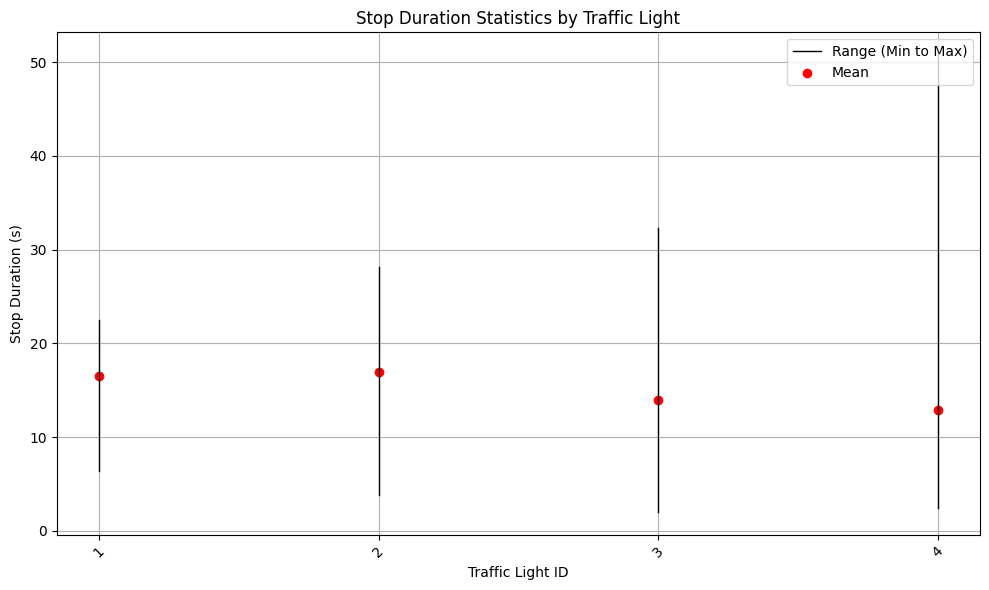

In [248]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by closest traffic light and compute statistics
stats = truncated_stops_df.groupby("closest_traffic_light")["duration"].agg(["mean", "max", "min"])

# Plot using candlestick style
plt.figure(figsize=(10, 6))

for i, (light, row) in enumerate(stats.iterrows()):
    plt.plot([i, i], [row["min"], row["max"]], color="black", linewidth=1)  # Candle line
    plt.scatter(i, row["mean"], color="red", label="Mean" if i == 0 else "")  # Mean point

plt.xticks(range(len(stats)), stats.index, rotation=45)
plt.xlabel("Traffic Light ID")
plt.ylabel("Stop Duration (s)")
plt.title("Stop Duration Statistics by Traffic Light")
plt.legend(["Range (Min to Max)", "Mean"], loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


## Computing the traffic time

In [285]:
# Ensure filtered_traffic_df is a copy, not a view
filtered_traffic_df = main_df[main_df["temp_distance"] < 2.5]

# Define a function to return both closest traffic light and distance
def get_closest_traffic_light_and_distance(row, traffic_lights_df):
    final_traffic_index = None
    final_traffic_distance = float("inf")
    for t_index, t_row in traffic_lights_df.iterrows():
        stop_location = (row["lat"], row["lon"])
        traff_lat, traff_lon = t_row["lat"], t_row["lon"]
        traffic_distance = geodesic(stop_location, (traff_lat, traff_lon)).meters
        if traffic_distance < final_traffic_distance:
            final_traffic_index = t_index
            final_traffic_distance = traffic_distance
    return final_traffic_index, final_traffic_distance

# Apply the function once and unpack the results into two new columns
filtered_traffic_df[["closest_traffic_light", "distance_to_traffic_light"]] = filtered_traffic_df.apply(
    lambda row: pd.Series(get_closest_traffic_light_and_distance(row, traffic_lights_df)), axis=1
)

# Display the updated DataFrame
filtered_traffic_df


/var/folders/08/xlt8ht5x04x0hg_fhxdwdl7m0000gr/T/ipykernel_24600/2620723533.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/08/xlt8ht5x04x0hg_fhxdwdl7m0000gr/T/ipykernel_24600/2620723533.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



lat        lon    speed  lon_acc  lat_acc    time  \
148     37.979531  23.735953  34.6074  -0.1803  -0.0259    5.92   
151     37.979523  23.735960  34.5345  -0.1528  -0.0205    6.04   
152     37.979520  23.735962  34.5135  -0.1395  -0.0184    6.08   
153     37.979517  23.735965  34.4944  -0.1255  -0.0160    6.12   
154     37.979514  23.735967  34.4775  -0.1097  -0.0135    6.16   
...           ...        ...      ...      ...      ...     ...   
672406  37.980044  23.735572  28.9885   0.3464   0.7262  818.64   
672407  37.980041  23.735574  29.0103   0.3757   0.7476  818.68   
672408  37.980039  23.735576  29.0349   0.3894   0.7668  818.72   
672409  37.980036  23.735577  29.0621   0.4186   0.7833  818.76   
672410  37.980034  23.735579  29.0949   0.4668   0.7967  818.80   

        dist_to_start  dist_to_end  veh_id  segment_id  temp_distance  \
148         63.790319   405.441173    32.0         2.0       2.494193   
151         64.870609   404.390127    32.0         2.0       2.438027   
152         65.243546   404.015773    32.0         2.0       2.471288   
153         65.667962   403.609838    32.0         2.0       2.417631   
154         66.040930   403.235503    32.0         2.0       2.450892   
...               ...          ...     ...         ...            ...   
672406       6.830528   470.813214   918.0         0.0       0.196335   
672407       6.678863   470.437966   918.0         0.0       0.229596   
672408       6.627068   470.165489   918.0         0.0       0.193825   
672409       6.446423   469.823714   918.0         0.0       0.314004   
672410       6.419241   469.551243   918.0         0.0       0.278233   

        one_axis_trajectory  closest_traffic_light  distance_to_traffic_light  
148            2.642274e+06                    1.0                   8.700978  
151            2.642275e+06                    1.0                   9.241005  
152            2.642275e+06                    1.0                   9.486560  
153            2.642276e+06                    1.0                   9.712309  
154            2.642276e+06                    1.0                   9.976247  
...                     ...                    ...                        ...  
672406         2.642232e+06                    0.0                  32.183260  
672407         2.642232e+06                    0.0                  32.559763  
672408         2.642232e+06                    0.0                  32.838304  
672409         2.642232e+06                    0.0                  33.173530  
672410         2.642233e+06                    0.0                  33.452028  

[172912 rows x 14 columns]

In [288]:
import numpy as np
import pandas as pd
# Define conditions and choices for traffic light states
conditions = [
    # (filtered_traffic_df["distance_to_traffic_light"] <= 30) & (filtered_traffic_df["speed"] > 1),  # Green
    (filtered_traffic_df["distance_to_traffic_light"] <= 30) & (filtered_traffic_df["speed"] <= 0.25),  # Red
]

choices = ["red"]

# Use np.select and assign traffic_light_state safely using .loc
filtered_traffic_df.loc[:, "traffic_light_state"] = np.select(conditions, choices, default="green")

# Map states to numeric values safely using .loc
state_mapping = {"green": 1, "yellow": 2, "red": 3}
filtered_traffic_df.loc[:, "state_numeric"] = filtered_traffic_df["traffic_light_state"].map(state_mapping)

# Display the updated DataFrame
filtered_traffic_df


lat        lon    speed  lon_acc  lat_acc    time  \
148     37.979531  23.735953  34.6074  -0.1803  -0.0259    5.92   
151     37.979523  23.735960  34.5345  -0.1528  -0.0205    6.04   
152     37.979520  23.735962  34.5135  -0.1395  -0.0184    6.08   
153     37.979517  23.735965  34.4944  -0.1255  -0.0160    6.12   
154     37.979514  23.735967  34.4775  -0.1097  -0.0135    6.16   
...           ...        ...      ...      ...      ...     ...   
672406  37.980044  23.735572  28.9885   0.3464   0.7262  818.64   
672407  37.980041  23.735574  29.0103   0.3757   0.7476  818.68   
672408  37.980039  23.735576  29.0349   0.3894   0.7668  818.72   
672409  37.980036  23.735577  29.0621   0.4186   0.7833  818.76   
672410  37.980034  23.735579  29.0949   0.4668   0.7967  818.80   

        dist_to_start  dist_to_end  veh_id  segment_id  temp_distance  \
148         63.790319   405.441173    32.0         2.0       2.494193   
151         64.870609   404.390127    32.0         2.0       2.438027   
152         65.243546   404.015773    32.0         2.0       2.471288   
153         65.667962   403.609838    32.0         2.0       2.417631   
154         66.040930   403.235503    32.0         2.0       2.450892   
...               ...          ...     ...         ...            ...   
672406       6.830528   470.813214   918.0         0.0       0.196335   
672407       6.678863   470.437966   918.0         0.0       0.229596   
672408       6.627068   470.165489   918.0         0.0       0.193825   
672409       6.446423   469.823714   918.0         0.0       0.314004   
672410       6.419241   469.551243   918.0         0.0       0.278233   

        one_axis_trajectory  closest_traffic_light  distance_to_traffic_light  \
148            2.642274e+06                    1.0                   8.700978   
151            2.642275e+06                    1.0                   9.241005   
152            2.642275e+06                    1.0                   9.486560   
153            2.642276e+06                    1.0                   9.712309   
154            2.642276e+06                    1.0                   9.976247   
...                     ...                    ...                        ...   
672406         2.642232e+06                    0.0                  32.183260   
672407         2.642232e+06                    0.0                  32.559763   
672408         2.642232e+06                    0.0                  32.838304   
672409         2.642232e+06                    0.0                  33.173530   
672410         2.642233e+06                    0.0                  33.452028   

       traffic_light_state  state_numeric  
148                  green              1  
151                  green              1  
152                  green              1  
153                  green              1  
154                  green              1  
...                    ...            ...  
672406               green              1  
672407               green              1  
672408               green              1  
672409               green              1  
672410               green              1  

[172912 rows x 16 columns]

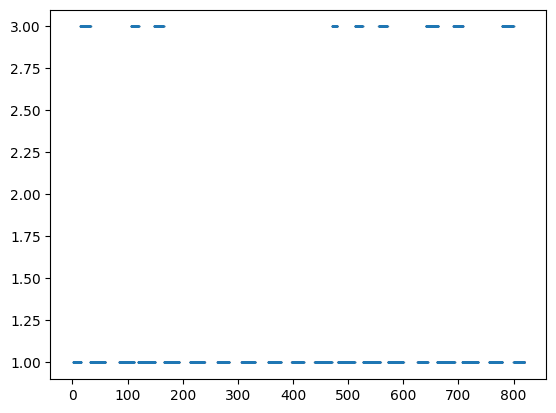

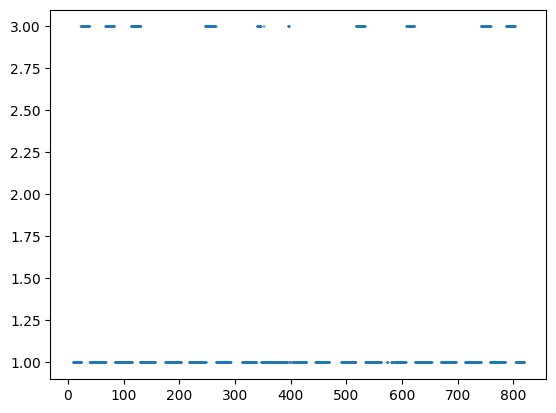

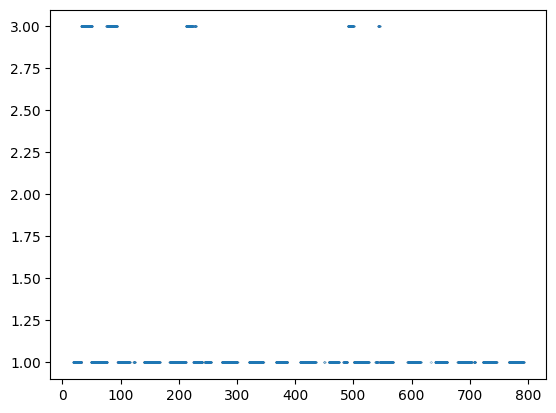

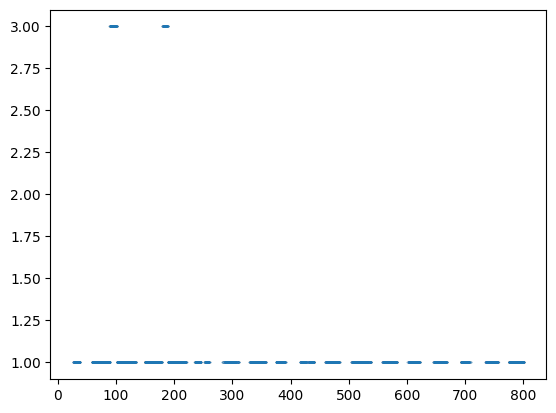

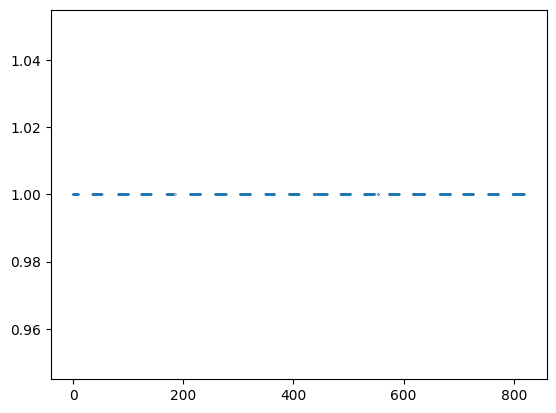

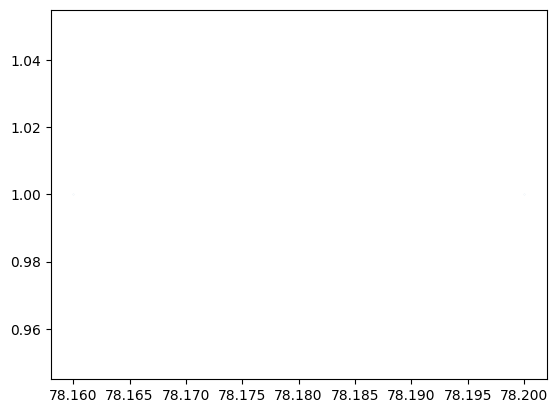

In [289]:
import matplotlib.pyplot as plt
for intersection_id in filtered_traffic_df["closest_traffic_light"].unique():
    intersection_df = filtered_traffic_df[filtered_traffic_df["closest_traffic_light"] == intersection_id]
    plt.scatter(intersection_df["time"], intersection_df["state_numeric"], label=f"Intersection {intersection_id}", s=0.001)
    plt.show()

In [290]:
import pandas as pd

states = []

# Group by 'closest_traffic_light'
for closest_traffic_light, group in filtered_traffic_df.sort_values("time").groupby("closest_traffic_light"):
    group = group.sort_values("time").reset_index(drop=True)  # Ensure the data is sorted by time
    state = None
    state_start = None

    for i, row in group.iterrows():
        if state != row["state_numeric"]:  # Start of a new state
            if state is not None:  # End the previous state
                state_end = row["time"]
                state_duration = state_end - state_start
                states.append({
                    "closest_traffic_light": closest_traffic_light,
                    "start_time": state_start,
                    "end_time": state_end,
                    "duration": state_duration,
                    "state": state,
                })
            # Update to the new state
            state = row["state_numeric"]
            state_start = row["time"]

    # Handle the final state after the loop
    if state is not None and state_start is not None:
        state_end = group["time"].iloc[-1]
        state_duration = state_end - state_start
        states.append({
            "closest_traffic_light": closest_traffic_light,
            "start_time": state_start,
            "end_time": state_end,
            "duration": state_duration,
            "state": state,
        })

# Convert to DataFrame
states_df = pd.DataFrame(states)

In [ ]:
from collections import defaultdict
traffic_info = defaultdict(lambda: defaultdict(str))
states_df_filtered = states_df[states_df["duration"] >= 5]
for index, row in traffic_lights_df.iterrows():
    for time in main_df.time.unique():
        if not states_df_filtered[(states_df_filtered["closest_traffic_light"] == index) & (states_df_filtered["start_time"] <= time) & (states_df_filtered["end_time"] >= time) & (states_df_filtered["state"] == 3)].empty:
            traffic_info[index][time] = "red"
        else:
            traffic_info[index][time] = "green"
        print(index, time, "done")
    # print(index, "done"

0 0.0 done
0 0.04 done
0 0.08 done
0 0.12 done
0 0.16 done
0 0.2 done
0 0.24 done
0 0.28 done
0 0.32 done
0 0.36 done
0 0.4 done
0 0.44 done
0 0.48 done
0 0.52 done
0 0.56 done
0 0.6 done
0 0.64 done
0 0.68 done
0 0.72 done
0 0.76 done
0 0.8 done
0 0.84 done
0 0.88 done
0 0.92 done
0 0.96 done
0 1.0 done
0 1.04 done
0 1.08 done
0 1.12 done
0 1.16 done
0 1.2 done
0 1.24 done
0 1.28 done
0 1.32 done
0 1.36 done
0 1.4 done
0 1.44 done
0 1.48 done
0 1.52 done
0 1.56 done
0 1.6 done
0 1.64 done
0 1.68 done
0 1.72 done
0 1.76 done
0 1.8 done
0 1.84 done
0 1.88 done
0 1.92 done
0 1.96 done
0 2.0 done
0 2.04 done
0 2.08 done
0 2.12 done
0 2.16 done
0 2.2 done
0 2.24 done
0 2.28 done
0 2.32 done
0 2.36 done
0 2.4 done
0 2.44 done
0 2.48 done
0 2.52 done
0 2.56 done
0 2.6 done
0 2.64 done
0 2.68 done
0 2.72 done
0 2.76 done
0 2.8 done
0 2.84 done
0 2.88 done
0 2.92 done
0 2.96 done
0 3.0 done
0 3.04 done
0 3.08 done
0 3.12 done
0 3.16 done
0 3.2 done
0 3.24 done
0 3.28 done
0 3.32 done
0 3.36 do

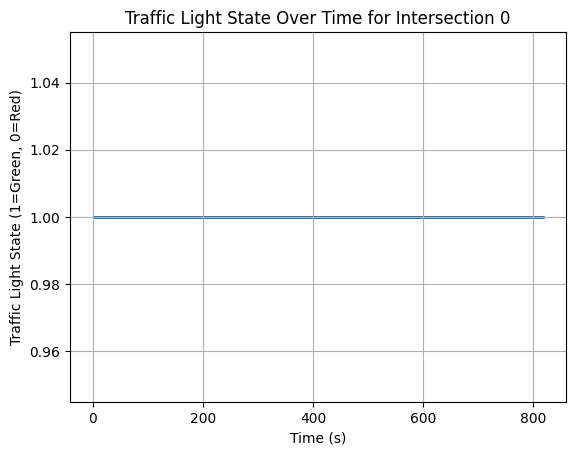

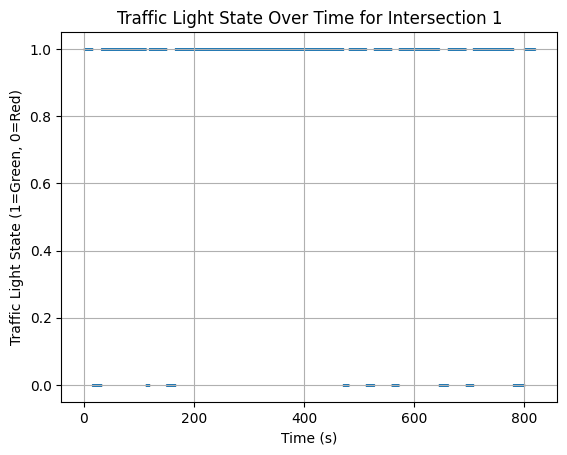

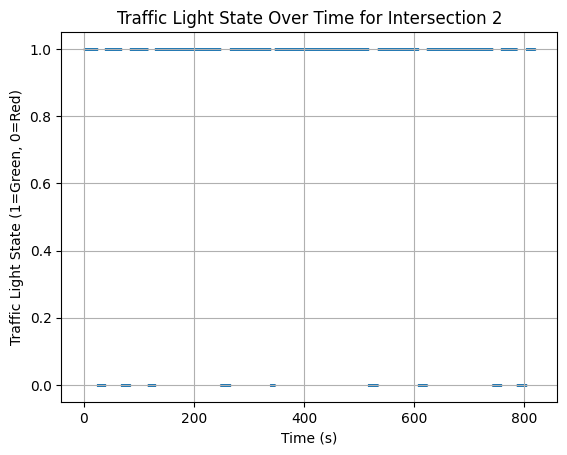

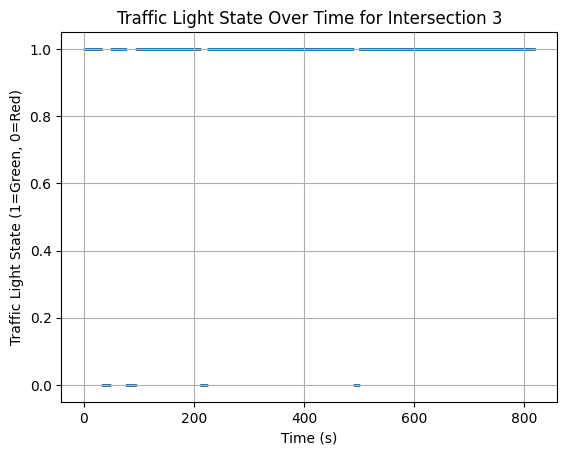

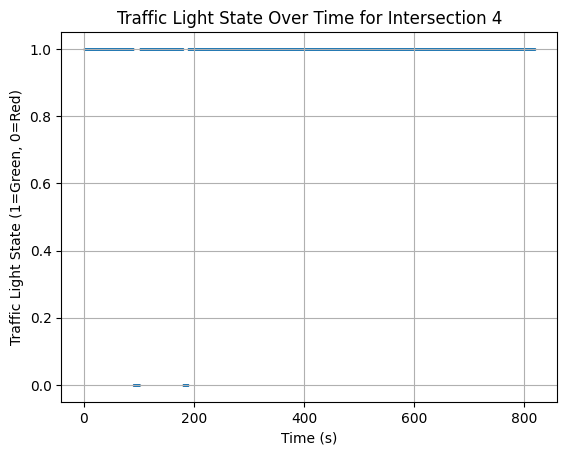

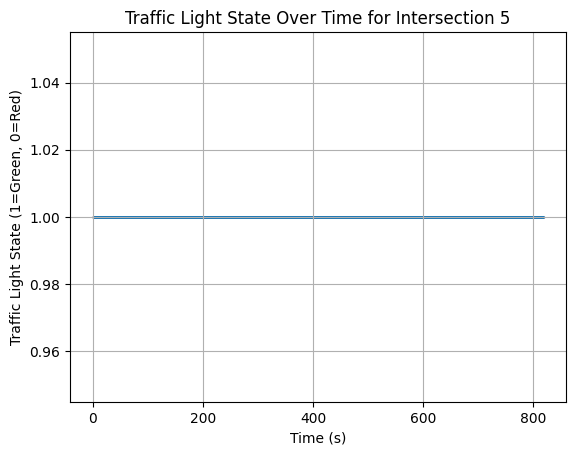

In [292]:

for key1, value1 in traffic_info.items():
    x = []
    y = []
    for key2, value2 in value1.items():
        x.append(key2)
        y.append(1 if value2=="green" else 0)
    plt.scatter(x, y, s=0.01)
    plt.xlabel("Time (s)")
    plt.ylabel("Traffic Light State (1=Green, 0=Red)")
    plt.title("Traffic Light State Over Time for Intersection " + str(key1))
    plt.grid()
    plt.show()

In [176]:
filtered_traffic_df

lat        lon    speed  lon_acc  lat_acc    time  \
148     37.979531  23.735953  34.6074  -0.1803  -0.0259    5.92   
151     37.979523  23.735960  34.5345  -0.1528  -0.0205    6.04   
152     37.979520  23.735962  34.5135  -0.1395  -0.0184    6.08   
153     37.979517  23.735965  34.4944  -0.1255  -0.0160    6.12   
154     37.979514  23.735967  34.4775  -0.1097  -0.0135    6.16   
...           ...        ...      ...      ...      ...     ...   
672406  37.980044  23.735572  28.9885   0.3464   0.7262  818.64   
672407  37.980041  23.735574  29.0103   0.3757   0.7476  818.68   
672408  37.980039  23.735576  29.0349   0.3894   0.7668  818.72   
672409  37.980036  23.735577  29.0621   0.4186   0.7833  818.76   
672410  37.980034  23.735579  29.0949   0.4668   0.7967  818.80   

        dist_to_start  dist_to_end  veh_id  segment_id  temp_distance  \
148         63.790319   405.441173    32.0         2.0       2.494193   
151         64.870609   404.390127    32.0         2.0       2.438027   
152         65.243546   404.015773    32.0         2.0       2.471288   
153         65.667962   403.609838    32.0         2.0       2.417631   
154         66.040930   403.235503    32.0         2.0       2.450892   
...               ...          ...     ...         ...            ...   
672406       6.830528   470.813214   918.0         0.0       0.196335   
672407       6.678863   470.437966   918.0         0.0       0.229596   
672408       6.627068   470.165489   918.0         0.0       0.193825   
672409       6.446423   469.823714   918.0         0.0       0.314004   
672410       6.419241   469.551243   918.0         0.0       0.278233   

        one_axis_trajectory  closest_traffic_light  distance_to_traffic_light  \
148            2.642274e+06                      1                   5.374993   
151            2.642275e+06                      1                   4.343672   
152            2.642275e+06                      1                   4.009245   
153            2.642276e+06                      1                   3.607782   
154            2.642276e+06                      1                   3.289461   
...                     ...                    ...                        ...   
672406         2.642232e+06                      0                  32.183260   
672407         2.642232e+06                      0                  32.559763   
672408         2.642232e+06                      0                  32.838304   
672409         2.642232e+06                      0                  33.173530   
672410         2.642233e+06                      0                  33.452028   

       traffic_light_state  state_numeric  
148                  green              1  
151                  green              1  
152                  green              1  
153                  green              1  
154                  green              1  
...                    ...            ...  
672406                 red              3  
672407                 red              3  
672408                 red              3  
672409                 red              3  
672410                 red              3  

[172912 rows x 16 columns]

### Saving the traffic light data

In [162]:
import json
with open("20181024_d1_0830_0900_traffic_light_states.json", "w") as f:
    json.dump(traffic_info, f)

# CTM model

## Loading the files

In [212]:
import pandas as pd
import json
import geopandas as gpd
from shapely.wkt import loads

# loading the main dataframe
main_df = pd.read_csv("20181024_d1_0830_0900_segmented_oneaxistrajectory_traffic.csv")
# loading the traffic light states
with open("20181024_d1_0830_0900_traffic_light_states.json") as f:
    traffic_info = json.load(f)
# loading the segments
segments_gdf = gpd.read_file("20181024_d1_0830_0900_segments.csv")
segments_gdf["geometry"] = segments_gdf["geometry"].apply(loads)
# loading the traffic lights
traffic_lights_df = pd.read_csv("traffic_lights.csv")


## Finding the segments the traffic light is located in

In [205]:
for jndex, jow in traffic_lights_df.iterrows():
    min_distance = float("inf")
    segment_id = None
    max_distance = float("-inf")
    max_segment_id = None
    for index, row in segments_gdf.iterrows():
        distance = row["geometry"].distance(Point(jow["lat"], jow["lon"]))
        if distance < min_distance:
            min_distance = distance
            segment_id = index
        
        if distance > max_distance:
            max_distance = distance
            max_segment_id = index
    traffic_lights_df.loc[jndex, "closest_segment"] = segment_id
    traffic_lights_df.loc[jndex, "segment_distance"] = min_distance
    traffic_lights_df.loc[jndex, "max_segment_distance"] = max_distance
    traffic_lights_df.loc[jndex, "furthest_segment"] = max_segment_id

traffic_lights_df

lat      lon  closest_segment  segment_distance  max_segment_distance  \
0  37.9803  23.7354              0.0          0.000028              0.004552   
1  37.9795  23.7360              2.0          0.000005              0.003561   
2  37.9789  23.7365              5.0          0.000013              0.002801   
3  37.9780  23.7372              8.0          0.000002              0.002562   
4  37.9774  23.7378             10.0          0.000099              0.003407   
5  37.9762  23.7377             14.0          0.000055              0.004344   

   furthest_segment  
0              14.0  
1              14.0  
2              14.0  
3               0.0  
4               0.0  
5               0.0

# Nov $27^{th}$

## Create the Graph

In [219]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, LineString

# Coordinates for the corridor
coords = [
    (37.98027257349481, 23.735392720193808),
    (37.97721963700775, 23.737817437139878),
    (37.976018724154066, 23.7376135892483)
]

# Define a buffer radius for the network
buffer_radius = 500  # in meters

# Get the road network around the corridor
center_point = coords[1]  # Use the middle point as the center
graph = ox.graph_from_point(center_point, dist=buffer_radius, network_type="drive")

# Convert graph to GeoDataFrame for visualization
edges_gdf = ox.graph_to_gdfs(graph, nodes=False, edges=True)

# Create a LineString for the corridor
corridor_line = LineString([(lon, lat) for lat, lon in coords])  # Ensure lon, lat order

# Find the closest edges to the corridor
edges_gdf["distance_to_corridor"] = edges_gdf.geometry.apply(lambda geom: geom.distance(corridor_line))
closest_edges = edges_gdf.nsmallest(3, "distance_to_corridor")

# Extract nodes connected to the matched edges from the graph
matched_nodes = set()
for _, edge in closest_edges.iterrows():
    edge_geometry = edge["geometry"]
    for u, v, data in graph.edges(data=True):
        # Match edge geometry with graph edge geometry
        if data.get("geometry") == edge_geometry:
            matched_nodes.update([u, v])

# Find upstream and downstream nodes for each matched node
upstream_nodes = set()
downstream_nodes = set()

for node in matched_nodes:
    upstream_nodes.update(nx.ancestors(graph, node))  # Upstream nodes
    downstream_nodes.update(nx.descendants(graph, node))  # Downstream nodes

print("Upstream Nodes:", upstream_nodes)
print("Downstream Nodes:", downstream_nodes)


Upstream Nodes: {250706436, 300401174, 300401175, 8446000669, 250690599, 7384248376, 250709582, 3339821648, 250691668, 250691669, 250691670, 250699359, 250712160, 250712161, 250712162, 8330742371, 250712163, 42240105, 7749831281, 7749831282, 300401270, 300401271, 250712188, 4037247100, 250712189, 8445978240, 250712199, 250691723, 250691724, 250712209, 250710162, 250691739, 250691741, 250691743, 250711203, 11212614820, 250691752, 250691753, 250691755, 250698924, 250698925, 250712241, 250710205, 10174555843, 300401860, 300401862, 300401863, 250691272, 300401360, 250691793, 250691794, 250711248, 250712283, 250712287, 653971685, 250694888, 653971690, 10126130418, 250691827, 250711286, 363391228, 250704638, 250692359, 250691847, 4456910095, 250699030, 4456910102, 4456910108, 4456910110, 250710312, 638591274, 954315051, 250692401, 250692403, 638591284, 250692405, 250692409, 939887931, 250692418, 638591300, 250691409, 359093585, 300400470, 300401494, 300400472, 954712407, 7275566937, 36339183

In [222]:
import folium

# Initialize the map centered on the midpoint of the corridor
center_lat, center_lon = coords[1]
m = folium.Map(location=(center_lat, center_lon), zoom_start=15)

# Add the corridor as a red line
folium.PolyLine([(lat, lon) for lat, lon in coords],
                color="red", weight=4, popup="Corridor").add_to(m)

# Add upstream nodes (blue)
for node in upstream_nodes:
    node_data = graph.nodes[node]
    folium.CircleMarker(
        location=(node_data["y"], node_data["x"]),
        radius=5,
        color="blue",
        fill=True,
        fill_color="blue",
        popup=f"Upstream Node {node}"
    ).add_to(m)

# Add downstream nodes (green)
for node in downstream_nodes:
    node_data = graph.nodes[node]
    folium.CircleMarker(
        location=(node_data["y"], node_data["x"]),
        radius=5,
        color="green",
        fill=True,
        fill_color="green",
        popup=f"Downstream Node {node}"
    ).add_to(m)

# Add edges (roads) from the matched edges
for u, v, data in graph.edges(data=True):
    if data.get("geometry") in closest_edges.geometry.values:
        edge_coords = list(data["geometry"].coords)
        folium.PolyLine([(lat, lon) for lon, lat in edge_coords], color="gray", weight=3).add_to(m)

# Save and show the map
m.save("upstream_downstream_map.html")
m
